In [159]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [160]:
# Set up matplotlib style
plt.style.use("seaborn-v0_8-whitegrid")

# Dataclass for parameters
@dataclass
class Parameters:
    mass: float = 1.0
    stiffness: float = 1.0
    damping: float = 0.1
    omega: float = np.sqrt(stiffness / mass)
    zeta: float = damping / (2 * np.sqrt(stiffness * mass))
    forcing_freq: float = 0.5
    F0: float = 1.0
    timestep: float = 0.01
    timefinal: float = 100.0
    x0: tuple = (0.0, 0.0)
    alpha: float = 0.1
    beta: float = 0.2

In [161]:
# Apply forcing term
def apply_forcing(t, params):
    return params.F0 * np.cos(params.forcing_freq * t)

# Define known physics
def apply_known_physics(x, params):
    return -2 * params.zeta * params.omega * x[1] - params.omega**2 * x[0]

In [191]:
# True model for the block slider
def build_true_model(t, x, params):
    forcing = apply_forcing(t, params)
    acceleration = apply_known_physics(x, params) + forcing / params.mass
    
    # dx / dt = 1 * v
    # dv/ dt =  (params.omega**2) * x + (-2 * params.zeta * params.omega) * v + (params.F0 / params.mass) * np.cos(params.forcing_freq * t)
    print(-params.omega**2, -2 * params.zeta * params.omega, params.F0 / params.mass)

    return [x[1], acceleration]

In [192]:
# Generate synthetic data
def generate_data(params):
    t = np.arange(0, params.timefinal, params.timestep)
    sol = solve_ivp(
        lambda t, x: build_true_model(t, x, params),
        t_span=[t[0], t[-1]],
        y0=params.x0,
        t_eval=t,
    )
    x = np.transpose(sol.y)
    print(x.shape)
    return t, x  

-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -0.1 1.0
-1.0 -

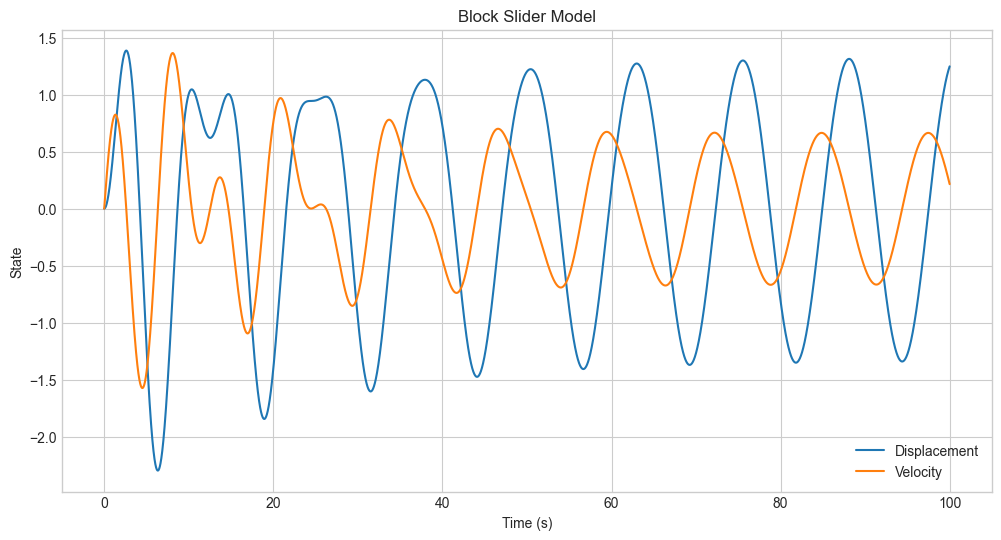

In [193]:
# Parameters
params = Parameters()

# Generate data
t, x = generate_data(params)

# concat t to x
x = np.concatenate((x, t[:, None]), axis=1)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, x[:, 0], label="Displacement")
plt.plot(t, x[:, 1], label="Velocity")
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("Block Slider Model")
plt.legend()
plt.show()

In [168]:
# print(t.shape, x.shape)

(10000,) (10000, 3)


In [169]:
print(x)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.99828169e-05 9.99479343e-03 1.00000000e-02]
 [1.99858484e-04 1.99783488e-02 2.00000000e-02]
 ...
 [1.24406976e+00 2.21149626e-01 9.99700000e+01]
 [1.24626564e+00 2.18094414e-01 9.99800000e+01]
 [1.24843117e+00 2.15034044e-01 9.99900000e+01]]


In [142]:
dt = t[1] - t[0]

In [199]:
import numpy as np
import pysindy as ps
from pysindy import SINDy
from pysindy.feature_library import CustomLibrary, FourierLibrary, PolynomialLibrary

# Define custom library functions
library_functions = [lambda x: np.cos(params.forcing_freq * x)] 
function_names = [lambda x: f'cos(w{x})']
# fourier_library = FourierLibrary(n_frequencies=1)
polynomial_library = PolynomialLibrary(degree=1)

# Create a custom library
custom_library = CustomLibrary(
    library_functions=library_functions,
    function_names=function_names
)

concat_library = custom_library + polynomial_library

# Prepare data for SINDy
X = np.column_stack((x[:, 0], x[:, 1], x[:, 2]))  # Stack input features
X_dot = np.gradient(X, axis=0, edge_order=2) / params.timestep  # Calculate derivatives

# Train the SINDy model with the custom library
optimizer = ps.SR3(threshold=0.1)
sindy_model = SINDy(feature_library=concat_library, optimizer=optimizer, feature_names=["x", "V", "t"])
sindy_model.fit(X, t=t)
sindy_model.print()

(x)' = 1.000 V
(V)' = 1.000 cos(wt) + -1.000 x + -0.100 V
(t)' = 1.000 1


In [200]:
# Simulate using the SINDy model
X_sindy = sindy_model.simulate(x[0, :], t)

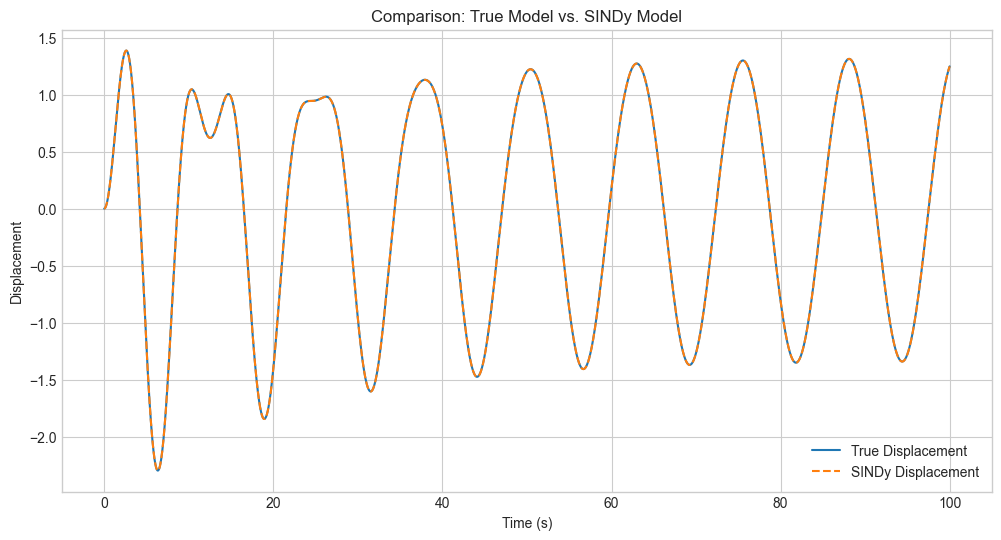

In [201]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(t, X[:, 0], label="True Displacement", linestyle="-")
plt.plot(t, X_sindy[:, 0], label="SINDy Displacement", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend()
plt.title("Comparison: True Model vs. SINDy Model")
plt.show()